In [1]:
from PIL import Image, ImageOps
import pytesseract
import cv2 as cv
from IPython.display import display
import numpy as np
from detection import L1_NUMBER, L2_NUMBER, L3_NUMBER, R1_NUMBER, R2_NUMBER, R3_NUMBER
from ocr import *

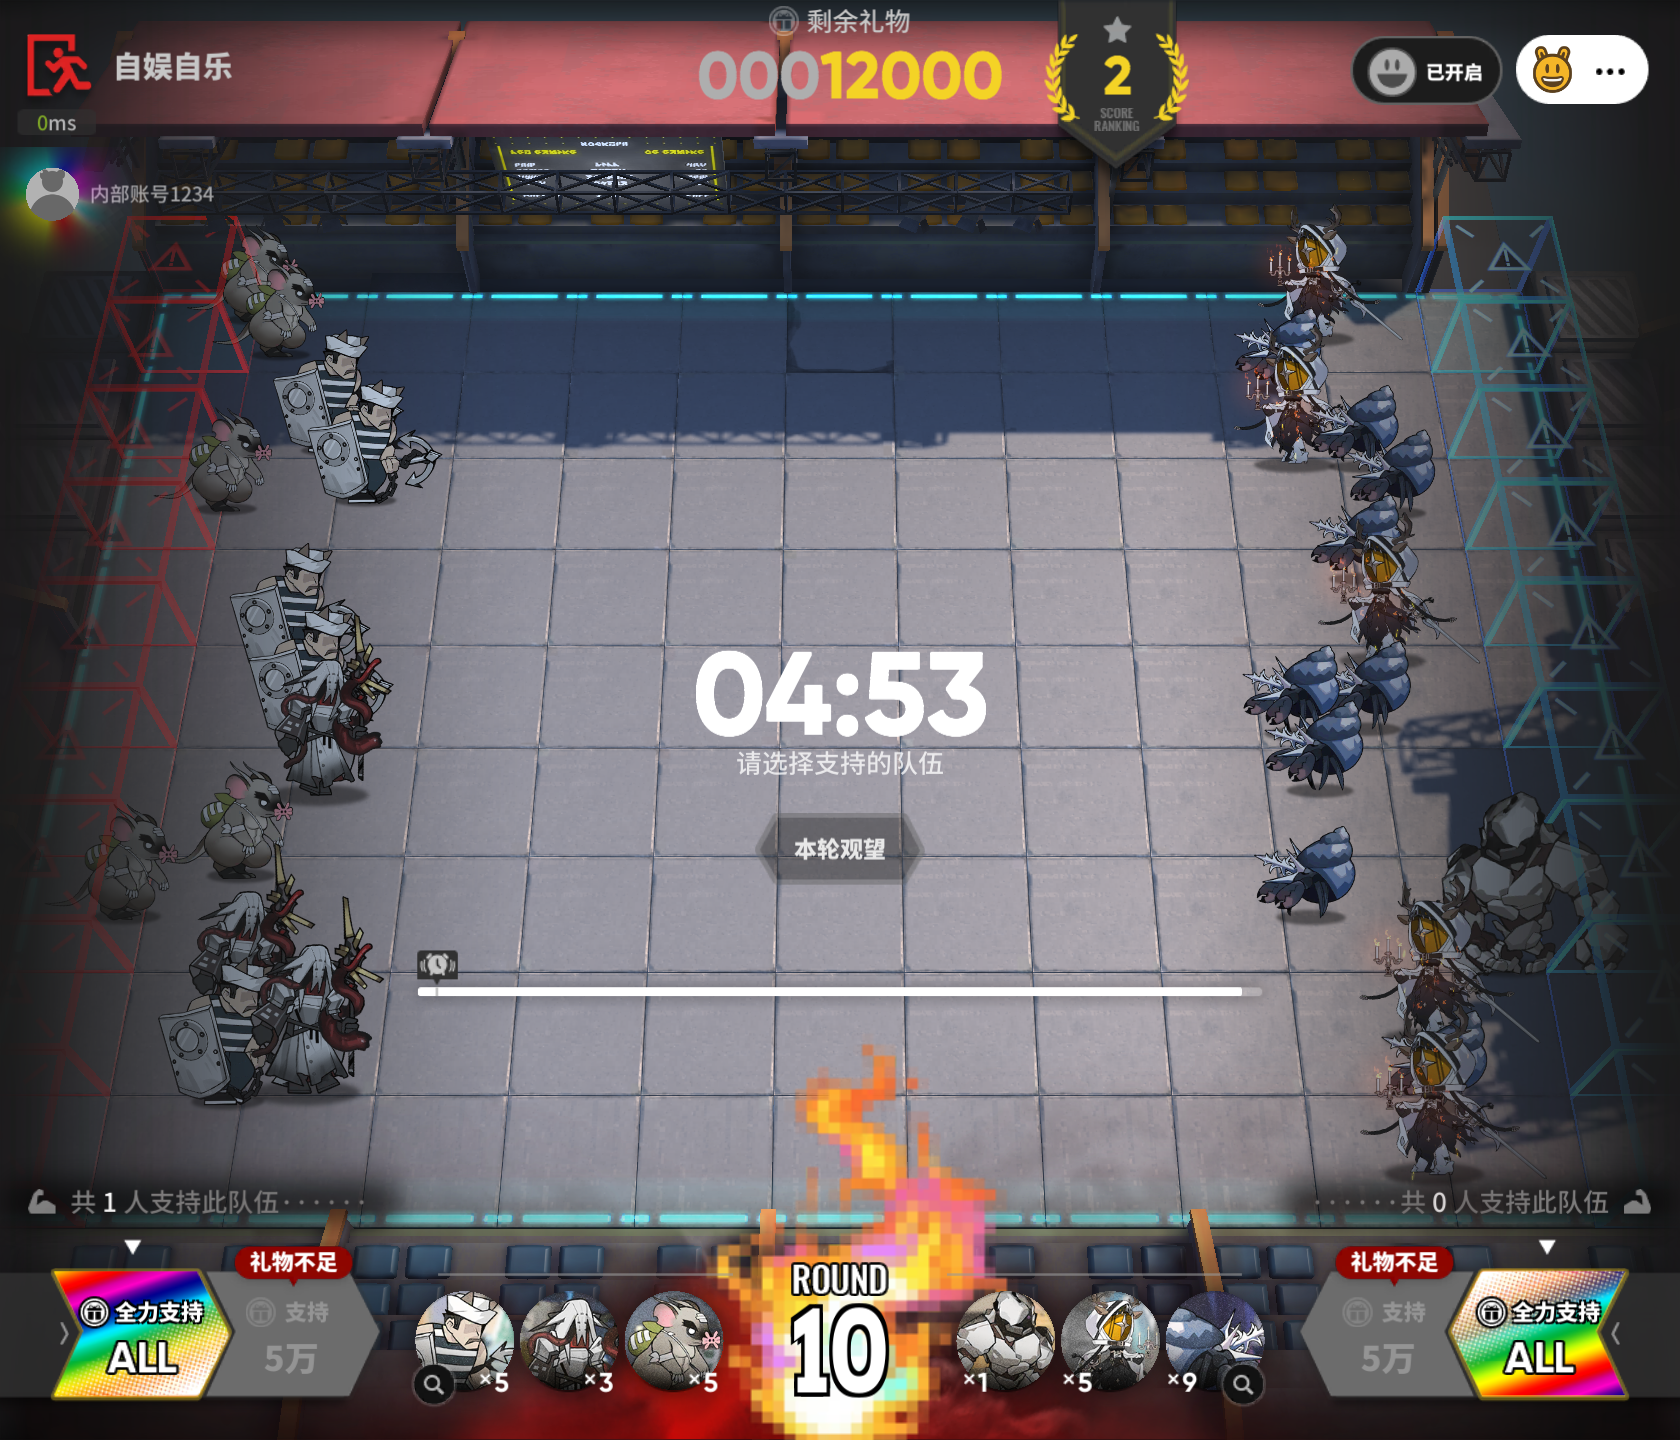

In [3]:
source = Image.open("assets/raw/10.png", "r")
display(source)

In [ ]:
cropped = source.crop((467, 1370, 467 + 67, 1366 + 26))
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
thresholded = cv.threshold(greyscaled, 170, 255, cv.THRESH_BINARY_INV)[1]
display(Image.fromarray(thresholded))

In [ ]:
import pytesseract
text = pytesseract.image_to_string(thresholded, config="-c tessedit_char_whitelist=x0123456789 --psm 7 --oem 0")
print(text)

In [ ]:
from ocr import crop_and_ocr
def parse_one(image, region, name):
    text = crop_and_ocr(image, region, invert=True, allowlist="x0123456789")
    if text:
        print(f"{name}: {text}")
    else:
        print(f"no text found at {name}")
        
def parse_all(source):
    parse_one(source, L1_NUMBER, "L1")
    parse_one(source, L2_NUMBER, "L2")
    parse_one(source, L3_NUMBER, "L3")
    parse_one(source, R1_NUMBER, "R1")
    parse_one(source, R2_NUMBER, "R2")
    parse_one(source, R3_NUMBER, "R3")

In [ ]:
for i in range(1, 40):
    with Image.open(f"assets/raw/{i}.png", "r") as img:
        display(f"parsing img {i}")
        display(img)
        parse_all(img)

In [ ]:
from detection import parse_participants

result = parse_participants(source)
print(result)

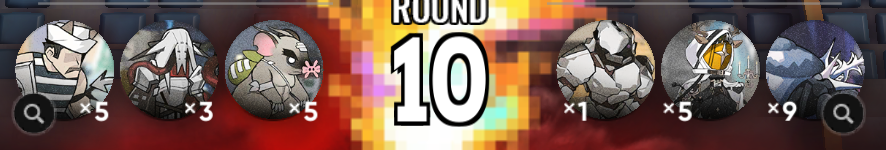

In [4]:
from detection import PARTICIPANTS

cropped = source.crop(PARTICIPANTS)
display(cropped)

In [2]:
from detection import model

In [5]:
result = model(cropped)


0: 192x1088 1 砸人的石头, 1 点灯骑士, 1 重生术师, 1 过气水手, 1 小寄居蟹, 46.5ms
Speed: 3.4ms preprocess, 46.5ms inference, 76.9ms postprocess per image at shape (1, 3, 192, 1088)


In [7]:
for i in result[0].summary():
    print(i)

{'name': '过气水手', 'class': 22, 'confidence': 0.92945, 'box': {'x1': 13.36768, 'y1': 15.91244, 'x2': 116.97512, 'y2': 120.95132}}
{'name': '砸人的石头', 'class': 7, 'confidence': 0.86269, 'box': {'x1': 552.01788, 'y1': 13.8857, 'x2': 657.15625, 'y2': 121.65047}}
{'name': '重生术师', 'class': 15, 'confidence': 0.78938, 'box': {'x1': 118.89268, 'y1': 14.51927, 'x2': 220.23932, 'y2': 123.77359}}
{'name': '点灯骑士', 'class': 14, 'confidence': 0.75031, 'box': {'x1': 665.7821, 'y1': 14.33196, 'x2': 761.48309, 'y2': 121.9048}}
{'name': '小寄居蟹', 'class': 26, 'confidence': 0.74456, 'box': {'x1': 762.13568, 'y1': 15.832, 'x2': 869.03961, 'y2': 120.60123}}


In [ ]:
from ocr import RESULT_LABEL
from ocr import crop_and_ocr

In [ ]:
losepage = Image.open("assets/raw/right.png", "r")
cropped_lose = losepage.crop(RESULT_LABEL)

display(cropped_lose)
lose = crop_and_ocr(losepage, RESULT_LABEL, invert=True, allowlist="LOSEWIN", oem=1).lower()
print(lose)

In [ ]:
winpage = Image.open("assets/raw/left.png", "r")
cropped_win = winpage.crop(RESULT_LABEL)

display(cropped_win)
win = crop_and_ocr(winpage, RESULT_LABEL, invert=True, allowlist="LOSEWIN", oem=1, threshold=160)
print(win)

In [ ]:
display(cropped_win)
cropped = np.array(cropped_win)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
thresholded = cv.threshold(greyscaled, 170, 255, cv.THRESH_BINARY_INV)[1]
display(Image.fromarray(thresholded))

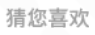

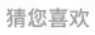

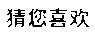

'190: '

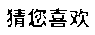

'193: '

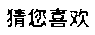

'196: '

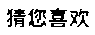

'199: '

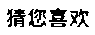

'202: '

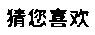

'205: '

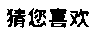

'208: '

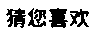

'211: '

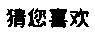

'214: '

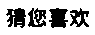

'217: '

In [8]:
source = Image.open("assets/ui/home2.png")
cropped = source.crop(MODE_LABEL)
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
for i in range(190, 220, 3):
    thresholded = cv.threshold(greyscaled, i, 255, cv.THRESH_BINARY)[1]
    display(Image.fromarray(thresholded))
    text = crop_and_ocr(source, MODE_LABEL, allowlist=MODE_LABEL_CONTENT, threshold=i, oem=1, chn=True)
    display(f"{i}: {text}")

In [ ]:
source = Image.open("assets/raw/finish1.png")
cropped = source.crop(END_LABEL)
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
thresholded = cv.threshold(greyscaled, 120, 255, cv.THRESH_BINARY)[1]
display(Image.fromarray(thresholded))
text = crop_and_ocr(source, END_LABEL, allowlist="返回主页", threshold=120, oem=1, chn=True).replace(" ","")
display(text)

In [ ]:
source = Image.open("assets/raw/home.png")
cropped = source.crop(HOME_LABEL)
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
thresholded = cv.threshold(greyscaled, 60, 255, cv.THRESH_BINARY)[1]
display(Image.fromarray(thresholded))
text = crop_and_ocr(source, HOME_LABEL, allowlist=HOME_LABEL_CONTENT, threshold=60, oem=1, chn=True).replace(" ","")
display(text)

In [ ]:
source = Image.open("assets/raw/home2.png")
cropped = source.crop(MODE_LABEL)
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
for i in range(100,250,10):
    thresholded = cv.threshold(greyscaled, i, 255, cv.THRESH_BINARY)[1]
    display(Image.fromarray(thresholded))
    text = crop_and_ocr(source, MODE_LABEL, allowlist=MODE_LABEL_CONTENT, threshold=i, oem=1, chn=True).replace(" ","")
    display(f"thres {i}: {text}")

In [ ]:
source = Image.open("assets/raw/left.png")
cropped = source.crop(RESULT_LABEL)
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
for i in range(100,250,10):
    thresholded = cv.threshold(greyscaled, i, 255, cv.THRESH_BINARY_INV)[1]
    display(Image.fromarray(thresholded))
    text = crop_and_ocr(source, RESULT_LABEL, allowlist=RESULT_LABEL_CONTENT, threshold=i, oem=1, invert=True).replace(" ","")
    display(f"thres {i}: {text}")

In [ ]:
source = Image.open("assets/raw/right.png")
cropped = source.crop(RESULT_LABEL)
display(cropped)
cropped = np.array(cropped)
greyscaled = cv.cvtColor(cropped, cv.COLOR_BGR2GRAY)
display(Image.fromarray(greyscaled))
for i in range(100,250,10):
    thresholded = cv.threshold(greyscaled, i, 255, cv.THRESH_BINARY_INV)[1]
    display(Image.fromarray(thresholded))
    text = crop_and_ocr(source, RESULT_LABEL, allowlist=RESULT_LABEL_CONTENT, threshold=i, oem=1, invert=True).replace(" ","")
    display(f"thres {i}: {text}")